# Logistic Regression Model comparing L1 and L2 loss

#### The following site was used to perform data cleaning: https://www.kaggle.com/harlfoxem/housesalesprediction/discussion

In [1]:
# loading libraries
import numpy as np 
#Numpy is the core library for scientific computing in Python. np is an alias pointing to numpy

import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
#Pandas is widely used Python library in data science mainly used for data munging.

import matplotlib as plt

import seaborn as sns 
#Seaborn is a Python visualization library based on matplotlib providing a high-level interface for drawing attractive statistical graphics.


## Step 1 : Importing libraries and the data set:

In [69]:
fp="C:/Vaibhavi/ML & Stat/kc_house_data.csv"

result=pd.read_csv(fp,dtype=object)#accessing fp to read .csv file using pd.read_csv()

result.head() #displays first 5 rows from the dataframe.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Output 1 :
From the first glance at the dataset we can say that , our data set has 21 columns which include the various housing features.However the coulmn names are difficult to interpret and need to be changed.

## Step 2: Quick Data Exploration

In [3]:
result.count()

id               20121
date             20121
price            20121
bedrooms         20121
bathrooms        20121
sqft_living      20121
sqft_lot         20121
floors           20121
waterfront       20121
view             20121
condition        20121
grade            20121
sqft_above       20121
sqft_basement    20121
yr_built         20121
yr_renovated     20121
zipcode          20121
lat              20121
long             20121
sqft_living15    20121
sqft_lot15       20121
dtype: int64

### Output 2:
The above output shows that all the columns are already clean.

## Step 3 : Data Exploration

In [4]:
result.apply(lambda x: sum(x.isnull()),axis=0)

#syntax : apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds)
#Return type of apply() depends on whether passed function aggregates, or the reduce argument if the DataFrame is empty.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Output 3: 
Here we were checking the missing values of the dataset.
We can see that there are 0 missing values for each column.

## Step 4 : How to check missing values in dataset?

In [5]:
result.info()

#The info() provides concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20121 entries, 0 to 20120
Data columns (total 21 columns):
id               20121 non-null object
date             20121 non-null object
price            20121 non-null object
bedrooms         20121 non-null object
bathrooms        20121 non-null object
sqft_living      20121 non-null object
sqft_lot         20121 non-null object
floors           20121 non-null object
waterfront       20121 non-null object
view             20121 non-null object
condition        20121 non-null object
grade            20121 non-null object
sqft_above       20121 non-null object
sqft_basement    20121 non-null object
yr_built         20121 non-null object
yr_renovated     20121 non-null object
zipcode          20121 non-null object
lat              20121 non-null object
long             20121 non-null object
sqft_living15    20121 non-null object
sqft_lot15       20121 non-null object
dtypes: object(21)
memory usage: 3.2+ MB


### Output 4:
The info() functions also can be used to check the data for null values.

In [6]:
#Some more data exploration:

result.describe()
#syntax of result(): describe(percentiles=None, include=None, exclude=None)
#describe() :Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,20121,20121,20121,20121,20121,20121,20121,20121,20121,20121,...,20121,20121,20121,20121,20121,20121,20121,20121,20121,20121
unique,19952,370,3430,13,26,879,9131,6,2,5,...,11,823,267,116,70,70,5011,750,704,8079
top,795000620,20140623T000000,450000,3,2.5,1300,5000,1,0,0,...,7,1300,0,2014,0,98038,47.5322,-122.3,1540,5000
freq,3,135,172,9508,5120,138,332,10369,20063,18653,...,8953,211,12550,492,19389,587,17,109,195,395


### Output 5:
The above output shows that we are not missing values in the columns as all values are 21613.

In [8]:
#Converting the data to float in order to use it for further exploration


result['price'] = result['price'].astype(int)
result['bedrooms'] = result['bedrooms'].astype(int)
result['bathrooms'] = result['bathrooms'].astype(float)
result['sqft_living'] = result['sqft_living'].astype(float)
result['sqft_lot'] = result['sqft_lot'].astype(float)
result['floors'] = result['floors'].astype(float)
result['waterfront'] = result['waterfront'].astype(float)
result['condition'] = result['condition'].astype(float)
result['grade'] = result['grade'].astype(float)
result['sqft_above'] = result['sqft_above'].astype(float)
result['sqft_basement'] = result['sqft_basement'].astype(float)
result['zipcode'] = result['zipcode'].astype(float)
result['yr_built'] = result['yr_built'].astype(float)
result['yr_renovated'] = result['yr_renovated'].astype(float)
result['sqft_basement'] = result['sqft_basement'].astype(float)
result['lat'] = result['lat'].astype(float)
result['long'] = result['long'].astype(float)
result['sqft_living15'] = result['sqft_living15'].astype(float)
result['sqft_lot15'] = result['sqft_lot15'].astype(float)

result.dtypes

id                object
date              object
price              int32
bedrooms           int32
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view              object
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

## Output 6
As seen in the above output all of the required field are converted to float datatype.

In [9]:
result['price'] = result['price'].map(lambda x: x>300000, 1)

In [10]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in ['price']:
   result[i]= labelencoder.fit_transform(result[i])
result.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,0,3,1.00,1180.0,5650.0,1.0,0.0,0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,1,3,2.25,2570.0,7242.0,2.0,0.0,0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,0,2,1.00,770.0,10000.0,1.0,0.0,0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,1,4,3.00,1960.0,5000.0,1.0,0.0,0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,1,3,2.00,1680.0,8080.0,1.0,0.0,0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


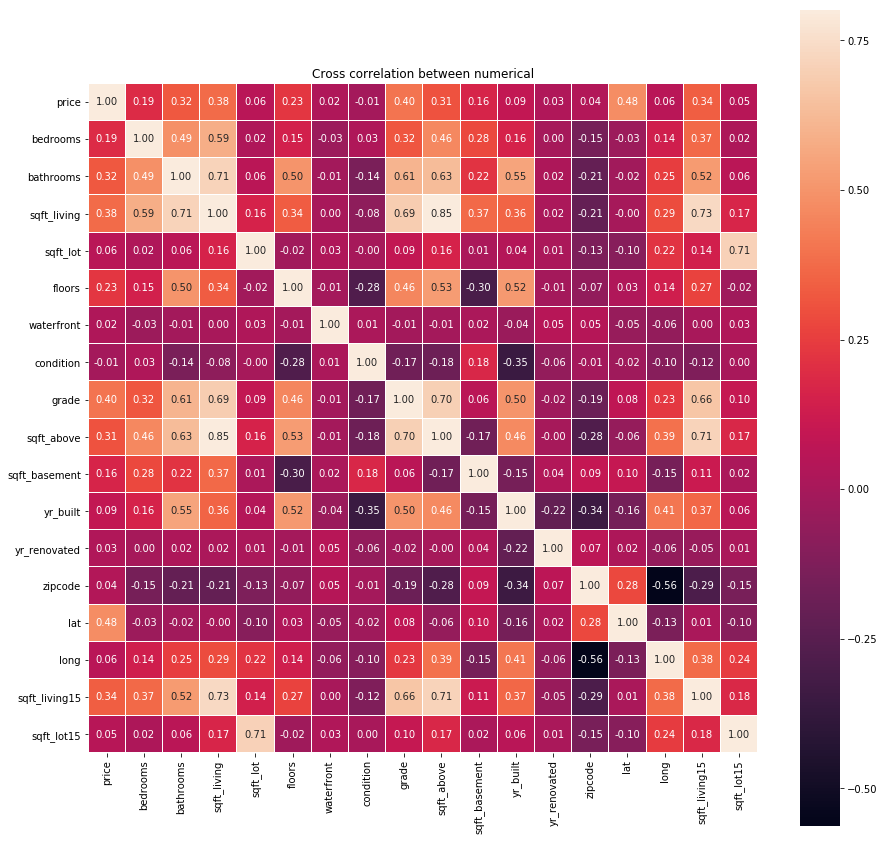

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(result.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

## Output 7

We can see that the price of house is corelated with the bedrooms, bathrooms, sqft_living,grade, sqft_above,sqft_living15, floor, lat

In [12]:
result.apply(lambda x: sum(x.isnull()),axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Logistic Regression

Logistic regression is used for prediction usually for a binary target.

The response taking a particular value is modeled based on combination of values taken by the predictors. 

#### L1 Penalty regression model

L1-norm loss function is also known as least absolute deviations (LAD), least absolute errors (LAE).

It is basically minimizing the sum of the absolute differences (S) between the target value  and the predicted values

In [52]:
#target
y = result["price"] 

#predictors
X = result[['bedrooms','bathrooms','sqft_living','sqft_above','grade','sqft_living15','waterfront','sqft_basement','floors','lat']]

#Using cross validation to fit the model
#by dividing it into test and train model and then fitting the trained model to the test ata
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1',fit_intercept = False)
mdl = model.fit(X, y)
model.coef_

array([[-2.21812954e-01, -3.13972080e-01,  5.83853379e-04,
         2.46730056e-04,  7.97839144e-01,  8.07336735e-04,
         2.24194159e+00,  1.27431396e-03,  6.20294526e-01,
        -1.49619801e-01]])

In [54]:
#Predicting the target test data using testing features 
predictions = mdl.predict(X_test)

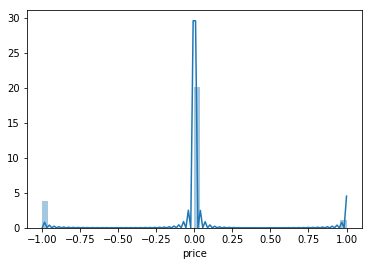

In [55]:
sns.distplot((y_test-predictions),bins=50);

In [59]:
accuracy=mdl.score(X_test, y_test)
print("Accuracy of logistic model for l1 penalty is ", accuracy*100)

Accuracy of logistic model for l1 penalty is  80.59627329192547


#### l2 penalty regression model

L2-norm loss function is also known as least squares error (LSE). It is basically minimizing the sum of the square of the differences (S) between the target value (Yi) and the predicted values

In [60]:
#target
y = result["price"] 

#predictors
X = result[['bedrooms','bathrooms','sqft_living','sqft_above','grade','sqft_living15','waterfront','sqft_basement','floors','lat']]

#Using cross validation to fit the model
#by dividing it into test and train model and then fitting the trained model to the test ata
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',fit_intercept = False)
mdl = model.fit(X, y)
model.coef_

array([[-2.11333709e-01,  5.23281009e-02,  8.29384986e-04,
         6.69597004e-05,  4.88914625e-01,  8.32867467e-04,
         6.08717274e-03,  7.62425284e-04,  2.41742788e-01,
        -1.09291183e-01]])

In [62]:
#Predicting the target test data using testing features 
predictions = mdl.predict(X_test)

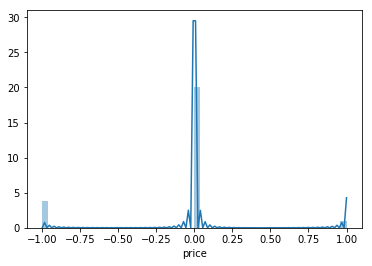

In [63]:
sns.distplot((y_test-predictions),bins=50);

In [65]:
accuracy=mdl.score(X_test, y_test)
print("Accuracy of logistic model for l2 penalty is ", accuracy*100)

Accuracy of logistic model for l2 penalty is  80.52173913043478


In [66]:
#### Comparing the l1 and l2 penalty for sparcity(no of )

In [67]:
# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

  

C=100.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.8011
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.7729
C=1.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.7997
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.7729
C=0.01
Sparsity with L1 penalty: 20.00%
score with L1 penalty: 0.7989
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.7729


#### We can see that large values of C give more freedom to the model.
#### The sparcity increases for l1 penalty as the value of C is small. Here we can see that sparcity for l1 penalty is 20%
#### l2 norm form squares the error and thus the model will see much larger error